<a href="https://colab.research.google.com/github/01PrathamS/PyTorch_Exercises/blob/main/Workflow_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch 
from torch import nn 
import numpy as np 
import matplotlib.pyplot as plt

1.Create a straight line dataset using the linear regression formula \(weight \times X + bias\).

- Set \(weight=0.3\) and \(bias=0.9\). Generate at least 100 datapoints in total.
- Split the data into 80% for training and 20% for testing.
- Plot the training and testing data to visualize the distribution.


In [2]:
weight = 0.3 
bias = 0.9 

start = 0 
end = 1 
step = 0.01 

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias 

X[:5],y[:5]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.9000],
         [0.9030],
         [0.9060],
         [0.9090],
         [0.9120]]))

In [3]:
train_split = int(0.8 * len(X)) 

X_train, y_train = X[:train_split], y[:train_split] 
X_test, y_test = X[train_split:], y[train_split:]

In [4]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  
  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_labels, c='b', s=4, label='Training')

  plt.scatter(test_data, test_labels, c='g',s=4, label='Testing')

  if predictions is not None: 

    plt.scatter(test_data, predictions, c='r', s=4, label='Prediction')

  plt.legend(prop={'size':14});

In [5]:
plot_predictions();

3.Build a PyTorch model by subclassing nn.Module.
- Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.
- Implement the forward() method to compute the linear regression function you used to create the dataset in 1.
- Once you've constructed the model, make an instance of it and check its state_dict().

In [17]:
# class LinearRegression_V0(nn.Module):

#   def __init__(self):
#     super().__init__()

#     self.weight = nn.Parameter(torch.randn(1,
#                                            dtype=torch.float,
#                                            requires_grad=True))
    
#     self.bias = nn.Parameter(torch.randn(1,
#                                          dtype=torch.float,
#                                          requires_grad=True))
    

#   def forward(self,x):
#     return self.weight * x + self.bias

class LinearRegression_V1(nn.Module): 
    
    def __init__(self): 
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor: 
        return self.linear_layer(x)

In [18]:
model_0 = LinearRegression_V1()
model_0.state_dict()

OrderedDict([('linear_layer.weight', tensor([[-0.4916]])),
             ('linear_layer.bias', tensor([-0.8251]))])

In [19]:
with torch.inference_mode():
  y_pred = model_0(X_test) 


# plot_predictions(predictions=y_pred)

3.Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.

- Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
- Write a training loop to perform the appropriate training steps for 300 epochs.
- The training loop should test the model on the test dataset every 20 epochs.

In [20]:
## create the loss function 

loss_fn = nn.L1Loss() 

## Create the optimizer 

optimizer = torch.optim.SGD(params= model_0.parameters(), 
                            lr = 0.01)

In [21]:
## write a training loop to perform the appropriate 
# training steps for 300 epochs.


torch.manual_seed(42) 

train_loss_values = []
test_loss_values = [] 
epoch_count = []

epochs = 900 

for epoch in range(epochs):

  model_0.train()

  y_pred = model_0(X_train) 

  loss = loss_fn(y_pred, y_train) 

  optimizer.zero_grad() 

  loss.backward() 

  optimizer.step() 

  ## put the model in evaluation mode 

  model_0.eval() 

  with torch.inference_mode():
    test_pred = model_0(X_test) 


    test_loss = loss_fn(test_pred, y_test.type(torch.float)) 

    if epoch % 30 == 0: 
      epoch_count.append(epoch) 
      train_loss_values.append(loss.detach().numpy()) 
      test_loss_values.append(test_loss.detach().numpy()) 
      print(f'epoch: {epoch} | MAE Train loss: {loss} | MAE Test Loss: {test_loss}')

epoch: 0 | MAE Train loss: 2.037777900695801 | MAE Test Loss: 2.420043706893921
epoch: 30 | MAE Train loss: 1.6909706592559814 | MAE Test Loss: 2.013986587524414
epoch: 60 | MAE Train loss: 1.344163417816162 | MAE Test Loss: 1.6079294681549072
epoch: 90 | MAE Train loss: 0.9973558187484741 | MAE Test Loss: 1.2018718719482422
epoch: 120 | MAE Train loss: 0.6505484580993652 | MAE Test Loss: 0.7958143949508667
epoch: 150 | MAE Train loss: 0.3037412166595459 | MAE Test Loss: 0.3897572159767151
epoch: 180 | MAE Train loss: 0.01730450615286827 | MAE Test Loss: 0.04231677204370499
epoch: 210 | MAE Train loss: 0.006833924911916256 | MAE Test Loss: 0.015256762504577637
epoch: 240 | MAE Train loss: 0.004822383634746075 | MAE Test Loss: 0.009765279479324818
epoch: 270 | MAE Train loss: 0.004822383634746075 | MAE Test Loss: 0.009765279479324818
epoch: 300 | MAE Train loss: 0.004822383634746075 | MAE Test Loss: 0.009765279479324818
epoch: 330 | MAE Train loss: 0.004822383634746075 | MAE Test Loss: 

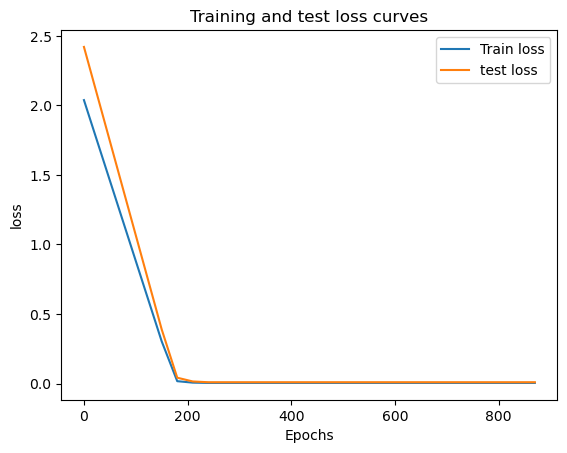

In [22]:
plt.plot(epoch_count, train_loss_values, label='Train loss') 
plt.plot(epoch_count, test_loss_values, label='test loss') 
plt.title('Training and test loss curves') 
plt.ylabel('loss') 
plt.xlabel('Epochs') 
plt.legend()

In [23]:

model_0.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.2979]])),
             ('linear_layer.bias', tensor([0.9057]))])

4. Make predictions with the trained model on the test data.

    - Visualize these predictions against the original training and testing data. Note: Ensure that the predictions are on the CPU if you want to use non-CUDA-enabled libraries, such as matplotlib, to plot.


In [24]:
with torch.inference_mode():
  y_pred = model_0(X_test) 



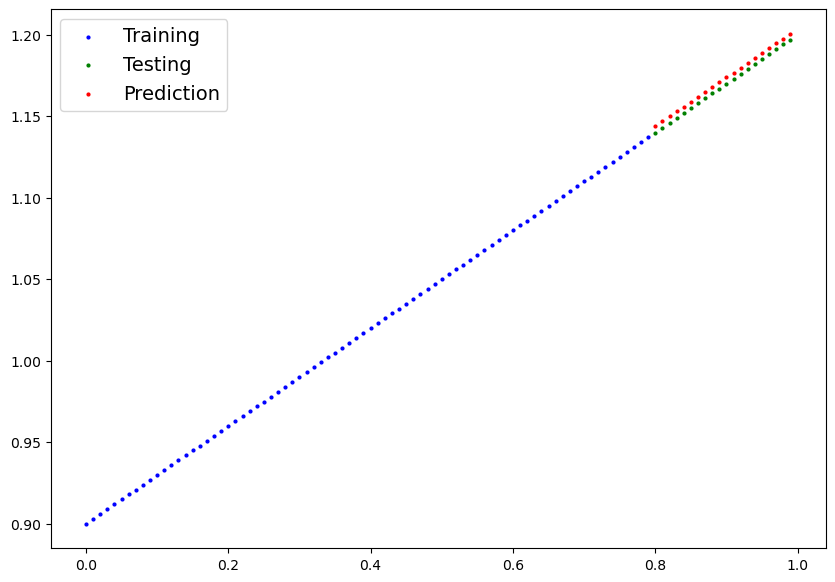

In [25]:
plot_predictions(predictions=y_pred)

5.Save your trained model's state_dict() to file.
-->Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it.
-->Perform predictions on your test data with the loaded model and confirm they match the original model predictionsfrom 4.

In [26]:
## Saving and loading model 

from pathlib import Path 

## Create model directory
MODEL_PATH = Path('models') 
MODEL_PATH.mkdir(parents=True, exist_ok=True)  

## create model save path 
MODEL_NAME = '01_pytorch_workflow_model_1.pth' 
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME 

## Save the model state dict 

print(f'Saving model to: {MODEL_SAVE_PATH}') 
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models\01_pytorch_workflow_model_1.pth


In [29]:
## Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_1 = LinearRegression_V1() 

## Load model state dict 
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH)) 

device = 'cuda' if torch.cuda.is_available() else 'cpu'

## Pyt model to target device
loaded_model_1.to(device)

LinearRegression_V1(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [30]:
## Evaluate loaded model 

loaded_model_1.eval() 

with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test) 

y_preds == loaded_model_1_preds

NameError: name 'y_preds' is not defined